##  Importing The Necessary Libraries.

In [0]:
import numpy as np
import tensorflow as tf
import time
import re
import pandas as pd

## Creating an empty list to append the itmes from the text file.

In [0]:
# Creating an empty list to append the title
job_title = []

## Reading and cleaning the data file and appending it to the above list.

In [0]:
# Reading hte file and Stripping the white spaces, removing the comma, and apostrophe.
with open('corpus.txt') as f:
    for line in f:
        job_title.append(line.strip().replace(',','').replace("'", ''))

## Cleaning the Job Titles

In [0]:
# Converting the short forms of the titles to full form
job_title[1] = job_title[1].replace('Sales Rep', 'Sales Representative')
job_title[2] = job_title[2].replace('Sales Rep', 'Sales Representative')
job_title[4] = job_title[4].replace('Vp', 'Vice President')
job_title[45] = job_title[45].replace('COO', 'Chief Operating Officer')
job_title[67] = job_title[67].replace('Vp', 'Vice President')
job_title[68] = job_title[68].replace('Vp', 'Vice President')
job_title[79] = job_title[79].replace('CMO', 'Chief Marketing Officer')
job_title[100] = job_title[100].replace('CFO', 'Chief Financial Officer')

## A glimpse of the data.

In [45]:
job_title[0:10]

['Sales Representative',
 'Sales Representative',
 'Sales Representative',
 'publisher',
 'Senior Vice President',
 'Risk Management',
 'Regional Manager',
 'Transportation Manager',
 'Vice President Bank',
 'Government Relations']

In [46]:
# All Commas and Apostrophe removed
job_title[1]

'Sales Representative'

## Converting the whole list elements to Lower Case.

In [0]:
# To convert the case to lower
lower = []
for i in job_title:
    lower.append(i.lower())

In [48]:
lower[0:10]

['sales representative',
 'sales representative',
 'sales representative',
 'publisher',
 'senior vice president',
 'risk management',
 'regional manager',
 'transportation manager',
 'vice president bank',
 'government relations']

## Using 'SET' function to filter out the duplicates.

In [0]:
# Removing Repeats or Duplicates. From 113 to 77 Job Titles. 36 Duplicate Job Titles are removed. 
remove_duplicates = list(set(lower))

## Converting List to DataFrame with the column as Job Title.

In [0]:
# Create DataFrame with a column name.
df = pd.DataFrame(remove_duplicates, columns = ['Job Title'])

## Creating a dict to add the specific Tags(Labels) to selected Titles.

In [0]:
# Create a dict with 'Job Title' as "Keys" and 'Tags' as "Values"
d = {'editor' : 'automation', 
     'publisher': 'automation', 
     'writer' : 'automation'}

## Using some Pandas Function to manipulate the data and map the above dict to the following Titles.

In [0]:
'''This creates a new column and splits the job title values and applies the lambda function and replaces the values 
   that are not present in the dictionary above. '''
   
df['Tag'] = (df['Job Title']
                 .str.split(expand=True)
                 .apply(lambda x: x.map(d).add(' | ').fillna(''))
                 .sum(axis=1)
                 .str.rstrip(' | ')
                 .replace('', 'seo'))

## Here we separate the 'Title' for 'Automation' by creating respective DataFrames.


In [0]:
# Filtering Out Only Automation
editor = df[df['Job Title'].str.contains('editor')]
publisher =  df[df['Job Title'].str.contains('publisher')]
writer = df[df['Job Title'].str.contains('writer')]

## Here we separate the 'Title' for 'SEO' by creating respective DataFrames.


In [0]:
# Filtering Out Only SEO
manager = df[df['Job Title'].str.contains('manager')]
owner = df[df['Job Title'].str.contains('owner')]
marketing = df[df['Job Title'].str.contains('marketing')]
media = df[df['Job Title'].str.contains('media')]
corporate_communication = df[df['Job Title'].str.contains('corporate_communication')]

## Finally we append everything together, ignoring the indexs.

In [0]:
# Combining all the data frames to one ignoring the index.
final = pd.concat([editor, publisher, writer, manager, owner, marketing, media, corporate_communication], ignore_index=True)

## Count of the Final df that we require.

In [56]:
# Everything cleaned and perfect. 
final.count()

Job Title    35
Tag          35
dtype: int64

## Shape of the df.

In [57]:
final.shape

(35, 2)

In [58]:
final

,Job Title,Tag
0,news editor,automation
1,policy editor,automation
2,associate editor,automation
3,publisher,automation
4,staff writer,automation
5,senior manager,seo
6,retention manager,seo
7,transportation manager,seo
8,service manager,seo
9,business development manager,seo


## Tagging the labels to 0 and 1

In [59]:
final['Tag'].replace({'automation':0,'seo':1},inplace=True)
final

,Job Title,Tag
0,news editor,0
1,policy editor,0
2,associate editor,0
3,publisher,0
4,staff writer,0
5,senior manager,1
6,retention manager,1
7,transportation manager,1
8,service manager,1
9,business development manager,1


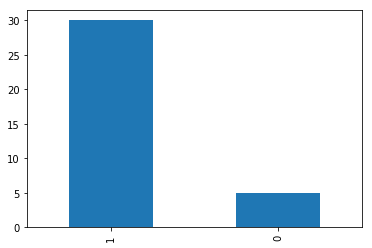

In [60]:
final['Tag'].value_counts().plot.bar()

## Word Cloud

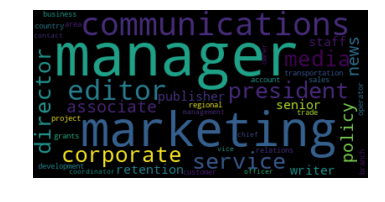

In [61]:
import matplotlib.pyplot as plt
from nltk.corpus import reuters
from wordcloud import WordCloud

wc=WordCloud().generate(' '.join(final['Job Title']))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()

##  Combining the words in Title


In [0]:
final['Job Title'] = final['Job Title'].str.replace(' ', '')

## As we combine whole title, it becomes one word. :-)

In [63]:
final['Job Title']

0                           newseditor
1                         policyeditor
2                      associateeditor
3                            publisher
4                          staffwriter
5                        seniormanager
6                     retentionmanager
7                transportationmanager
8                       servicemanager
9           businessdevelopmentmanager
10      marketingcommunicationsmanager
11                       grantsmanager
12                       branchmanager
13                     regionalmanager
14                        salesmanager
15                      projectmanager
16                    marketingmanager
17                        trademanager
18            customerrelationsmanager
19                      accountmanager
20                      countrymanager
21                         areamanager
22                       owneroperator
23                 managementmarketing
24                marketingcoordinator
25              vicepresi

## Creating Dependent and Independent variables

In [0]:
x = final['Job Title']
y = final['Tag']

## Splitting the data set in Training and Testing data

In [0]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [66]:
print(X_train.shape)
print(x_test.shape)
print(Y_train.shape)
print(y_test.shape)

(24,)
(11,)
(24,)
(11,)


## Before Sampling

In [67]:
print(sum(Y_train==0))
print(sum(Y_train==1))

4
20


## Now we need to convert 'Job TItles' as Vectors in order to sample it with NearMiss.

### Before applying to the Vectorizer we will create a Variable and storing the Job Titles. This is going to be used to apply the transform. 


In [0]:
transform = final['Job Title']

## Count Vectorizer

In [0]:
# Converting the TItle to Vector
# CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(transform)
train = vectorizer.transform(X_train)
test = vectorizer.transform(x_test)

In [70]:
print(train.shape)
print(test.shape)

(24, 33)
(11, 33)


In [71]:
print(type(train))
print(train.toarray())

<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0

In [72]:
print(type(test))
print(test.toarray())

<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]


In [73]:
import pprint
pprint.pprint(vectorizer.vocabulary_)

{'accountmanager': 0,
 'areamanager': 1,
 'associateeditor': 2,
 'branchmanager': 3,
 'businessdevelopmentmanager': 4,
 'chiefmarketingofficer': 5,
 'corporatemarketingcommunications': 6,
 'countrymanager': 7,
 'customerrelationsmanager': 8,
 'directormarketingcommunications': 9,
 'grantsmanager': 10,
 'managementmarketing': 11,
 'marketingcommunicationsmanager': 12,
 'marketingcoordinator': 13,
 'marketingdirector': 14,
 'marketingmanager': 15,
 'mediacontact': 16,
 'mediaservices': 17,
 'newseditor': 18,
 'owneroperator': 19,
 'policyeditor': 20,
 'presidentcorporatemarketing': 21,
 'projectmanager': 22,
 'publisher': 23,
 'regionalmanager': 24,
 'retentionmanager': 25,
 'salesmanager': 26,
 'seniormanager': 27,
 'servicemanager': 28,
 'staffwriter': 29,
 'trademanager': 30,
 'transportationmanager': 31,
 'vicepresidentmarketing': 32}


## Converting the Vectorized object to Array and storing in X_train.

In [74]:
train_x = train.toarray()
X_train = train_x
X_train.shape

(24, 33)

## Converting the Vectorized object to Array and storing in x_test.

In [75]:
test_x = test.toarray()
x_test = test_x
x_test.shape

(11, 33)

## Mannaging the Imbalance by 'NearMiss'

In [0]:
from imblearn.under_sampling  import NearMiss
nr=NearMiss()
x_train,y_train=nr.fit_sample(X_train, Y_train)


## Checking the balance.

In [77]:
print(sum(y_train==0))
print(sum(y_train==1))

4
4


# Model Fitting and Accuracy

## Importing the important Libraries

In [0]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression



lr=LogisticRegression()
lr.fit(X_train, Y_train)
predict=lr.predict(x_test)
accuracy=metrics.accuracy_score(y_test,predict)
print("logistic regression accuracy:", accuracy*100)

print("area under curve")
print(roc_auc_score(y_test,predict))
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

logistic regression accuracy: 90.9090909090909
area under curve
0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.91      1.00      0.95        10

    accuracy                           0.91        11
   macro avg       0.45      0.50      0.48        11
weighted avg       0.83      0.91      0.87        11

[[ 0  1]
 [ 0 10]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Decission Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
predict=dc.predict(x_test)
accuracy=metrics.accuracy_score(y_test,predict)
print("Decision Tree accuracy:", accuracy*100)

Decision Tree accuracy: 90.9090909090909


## Gaussian Method

In [85]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(x_train,y_train)
predict=gnb.predict(x_test)
accuracy=metrics.accuracy_score(y_test,predict)
print("Naive Bayes classifier:", accuracy*100)


Naive Bayes classifier: 81.81818181818183


## Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predict=rf.predict(x_test)
accuracy=metrics.accuracy_score(y_test,predict)
print("Random forest classifier:", accuracy*100)


Random forest classifier: 90.9090909090909


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# End of Notebook